## Importing libraries and data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/verzeo/Loan.csv')

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Data Cleaning

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Filling missing values in categorical variables

In [ ]:
categoricals = ['Gender', 'Married', 'Dependents', 'Self_Employed','Loan_Amount_Term', 'Credit_History']

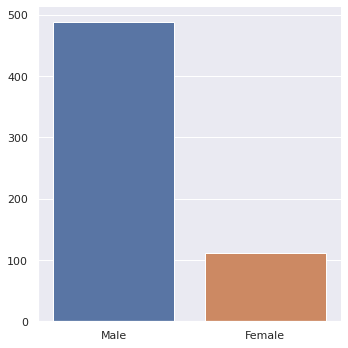

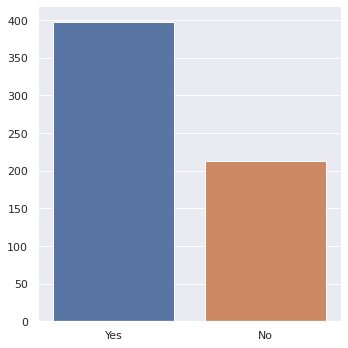

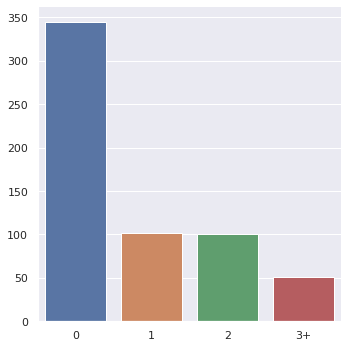

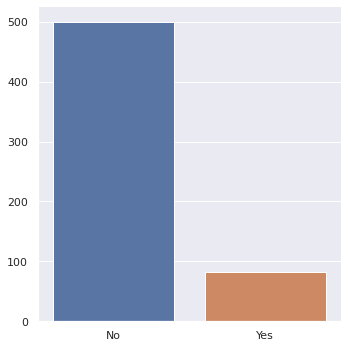

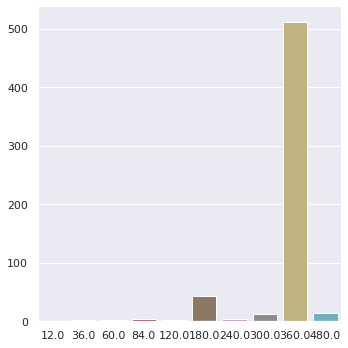

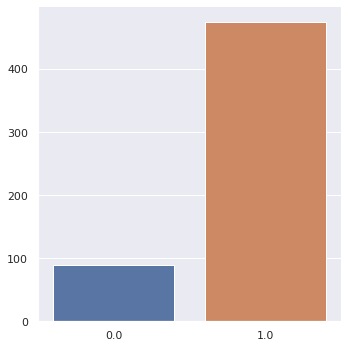

In [ ]:
for col in categoricals:
  sns.catplot(x = df[col].value_counts().index, y = df[col].value_counts().values,data = df,kind = 'bar');

In [ ]:
def fill(x):
  df[x].fillna(df[x].value_counts().index[0],inplace = True)

In [ ]:
for x in categoricals:
  fill(x)

### Filling missing values in continuous variables

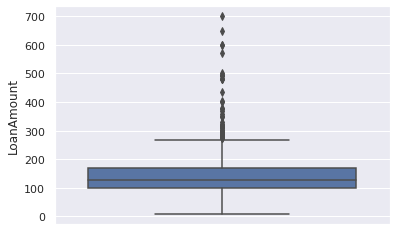

In [ ]:
sns.boxplot(data = df, y = df.LoanAmount);

In [ ]:
df.LoanAmount.fillna(df.LoanAmount.median(), inplace = True)

In [ ]:
df.isnull().any().sum()

0

## Converting categorical features into numeric values 

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categoricals = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 
                'Property_Area', 'Loan_Status']
for feature in categoricals:
  df[feature] = le.fit_transform(df[feature])

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


## Feature Selection

In [ ]:
df.drop(columns = ['Loan_ID'], inplace = True)

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [ ]:
X = df.iloc[:,0:11]
Y = df.iloc[:,11]

[0.02232817 0.0182515  0.05358193 0.02007051 0.02099502 0.18562794
 0.12010533 0.18201156 0.04599608 0.28329453 0.04773744]


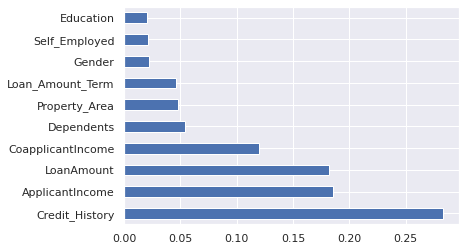

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh');
plt.show();

In [ ]:
features = feat_importances.nlargest(10).index

In [ ]:
X_ = pd.DataFrame()
for feature in features:
  X_[feature] = df[feature]

In [ ]:
X_.head()

,Credit_History,ApplicantIncome,LoanAmount,CoapplicantIncome,Dependents,Property_Area,Loan_Amount_Term,Gender,Self_Employed,Education
0,1.0,5849,128.0,0.0,0,2,360.0,1,0,0
1,1.0,4583,128.0,1508.0,1,0,360.0,1,0,0
2,1.0,3000,66.0,0.0,0,2,360.0,1,1,0
3,1.0,2583,120.0,2358.0,0,2,360.0,1,0,1
4,1.0,6000,141.0,0.0,0,2,360.0,1,0,0


## Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_,Y,test_size = 0.30,random_state = 42)

In [ ]:
print(X_train.shape, X_test.shape)

(429, 10) (185, 10)


## Building Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth = 4, random_state = 0)

model.fit(X_train, Y_train)

Y_predictions = model.predict(X_test)

### Model Evaluation

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, Y_predictions)
confusion_matrix

array([[ 26,  39],
       [  8, 112]])

In [ ]:
accuracy = metrics.accuracy_score(Y_test, Y_predictions)
print("Accuracy of Decision Tree Model is {:.3f} %".format(accuracy * 100))

Accuracy of Decision Tree Model is 74.595 %


## Building Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 100, random_state = 0)

forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
Y_prediction = forest.predict(X_test)

### Model Evaluation

In [ ]:
accuracy = metrics.accuracy_score(Y_test, Y_prediction)

print("Accuracy of Random Forest Classifier Model is {} %".format(accuracy * 100))

Accuracy of Random Forest Classifier Model is 76.75675675675676 %


## Building Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
l_r = LogisticRegression(C = 1000)
l_r.fit(X_train, Y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
Y_prediction = l_r.predict(X_test)

### Model Evaluation

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, Y_prediction)
confusion_matrix

array([[ 27,  38],
       [  2, 118]])

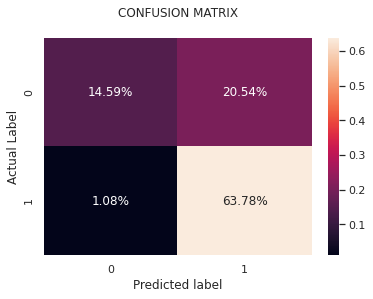

In [ ]:
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot = True, fmt = '.2%');
plt.title("CONFUSION MATRIX\n")
plt.xlabel("Predicted label")
plt.ylabel("Actual Label")
plt.show()

In [ ]:
accuracy = metrics.accuracy_score(Y_test, Y_prediction)
print("Accuracy of Logistic Regression Model is {} %".format(accuracy * 100))

Accuracy of Logistic Regression Model is 78.37837837837837 %


## Building Random Forest Regressor

In [ ]:
df_r = df[df['Loan_Status']== 1]

In [ ]:
df_r.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [ ]:
df_r.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [ ]:
df_r.drop(columns= ['Loan_Status'], inplace = True)

In [ ]:
df_r.shape

(422, 11)

In [ ]:
cols = list(df_r.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('LoanAmount')) #Remove LoanAmount from list
df_r = df_r[cols+['LoanAmount']] #Create new dataframe with columns in the order you want

In [ ]:
df_r.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount
0,1,0,0,0,0,5849,0.0,360.0,1.0,2,128.0
2,1,1,0,0,1,3000,0.0,360.0,1.0,2,66.0
3,1,1,0,1,0,2583,2358.0,360.0,1.0,2,120.0
4,1,0,0,0,0,6000,0.0,360.0,1.0,2,141.0
5,1,1,2,0,1,5417,4196.0,360.0,1.0,2,267.0


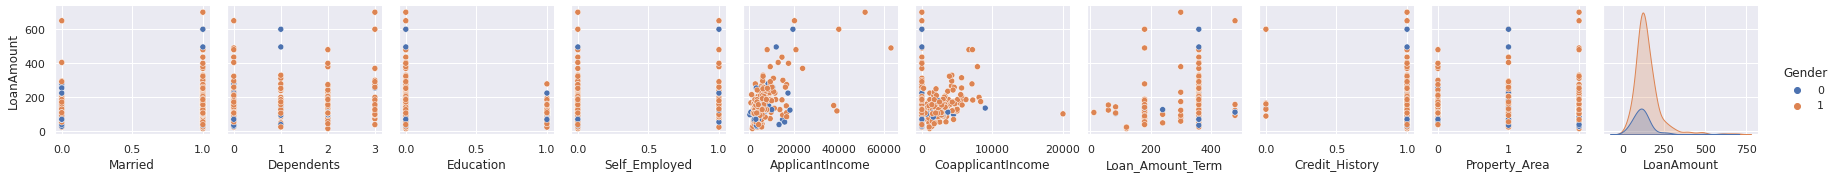

In [ ]:
#df_r.hist(bins = 10, figsize = (40, 20), grid = False);
sns.pairplot(data = df_r, hue = 'Gender', y_vars = ['LoanAmount'] );

In [ ]:
df_r.drop(columns = ['Married'], inplace = True)

In [ ]:
df_r.shape

(422, 10)

In [ ]:
X_r = df_r.iloc[:,0:9]
Y_r = df_r.iloc[:,9]

[0.03670722 0.06864689 0.02193929 0.03483504 0.55043467 0.1353207
 0.07966423 0.01307615 0.05937581]


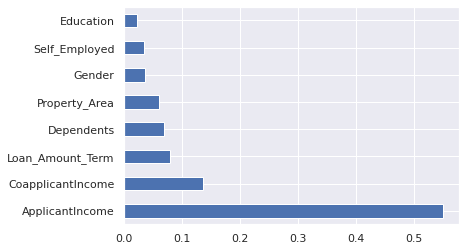

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X_r,Y_r)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_r.columns)
feat_importances.nlargest(8).plot(kind='barh');
plt.show();

In [ ]:
X_r = X_r[['ApplicantIncome', 'CoapplicantIncome',
       'Dependents', 'Property_Area', 'Loan_Amount_Term', 'Self_Employed',
       'Education', 'Gender']]

In [ ]:
X_r.head()

,ApplicantIncome,CoapplicantIncome,Dependents,Property_Area,Loan_Amount_Term,Self_Employed,Education,Gender
0,5849,0.0,0,2,360.0,0,0,1
2,3000,0.0,0,2,360.0,1,0,1
3,2583,2358.0,0,2,360.0,0,1,1
4,6000,0.0,0,2,360.0,0,0,1
5,5417,4196.0,2,2,360.0,1,0,1


In [ ]:
from sklearn.model_selection import train_test_split

X_trainr, X_testr, Y_trainr, Y_testr = train_test_split(X_r,Y_r,test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10000, random_state = 42)

rf.fit(X_trainr, Y_trainr)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
Y_pred = rf.predict(X_testr)

In [ ]:
# Calculate the absolute errors
errors = abs(Y_pred - Y_testr)

In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_testr)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 61.68 %.


## Loan Amount Prediction

In [ ]:
def predict_price(columns):
  price = rf.predict(columns)
  return price

In [ ]:
yesorno = []

for feature in features:
  yesorno.append(float(input("Enter {}\n".format(feature))))

print(l_r.predict([yesorno]))

if(l_r.predict([yesorno]) == 1):
  yesorno.pop(0)
  yesorno.pop(2)
  price = predict_price([yesorno])
  print("You can be given a loan amount of {} lakhs".format(price[0]))

else:
  print("Sorry you can't be provided with loan")

Enter Credit_History
1
Enter ApplicantIncome
5849
Enter LoanAmount
128
Enter CoapplicantIncome
0
Enter Dependents
2
Enter Property_Area
0
Enter Loan_Amount_Term
360
Enter Gender
1
Enter Self_Employed
0
Enter Education
0
[1]
You can be given a loan amount of 143.8659 lakhs
